In [48]:
from goessolarretriever import Retriever, Satellite, Product
from matplotlib import pyplot as plt, dates as mdates
from datetime import datetime
import xarray as xr
import pandas as pd

satellite = Satellite.GOES18
start = datetime(2024, 10, 10); end = datetime(2024, 10, 11)

r = Retriever(); product = Product.magn_l2_avg1m
df = r.search(satellite, product, start, end).drop_duplicates()
df['date_begin'] = pd.to_datetime(df['file_name'].str.extract(r".*_d(\d{8})_.*").iloc[:,0],format='%Y%m%d')
df = df.set_index('date_begin',drop=False).sort_index()
df = df[(df.index >= start) & (df.index <= end)]
df = df[df.file_name.str.contains('v2-0-2')]
r.retrieve(df, f"{product}/data/")
df.to_csv(f"{product}/files.csv")

2it [00:02,  1.20s/it]


In [ ]:
d = []
for date,row in df.iterrows():
    ds = xr.load_dataset(f"{product}/data/{row.file_name}")
    d.append(ds.b_epn)

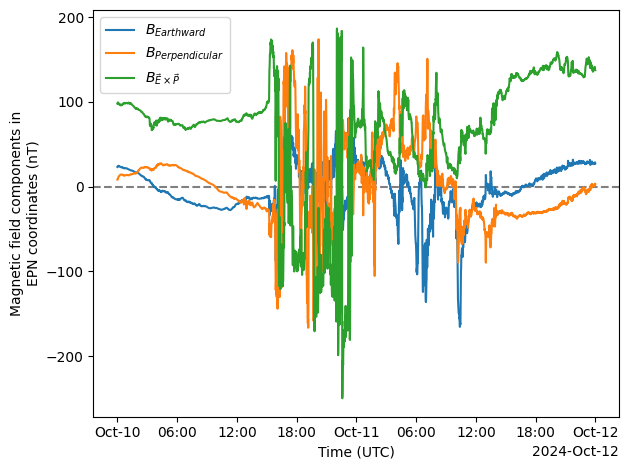

In [62]:
cat = xr.concat(d,'time')
plt.ylabel(f'Magnetic field components in\nEPN coordinates ({cat.units})')
plt.xlabel('Time (UTC)')
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.DateLocator()))
plt.axhline(0,linestyle='--',color='grey')
coords = {'Earthward':0,'Perpendicular':1,r'\vec{E} \times \vec{P}':2}
for coordname,coordv in coords.items():
    plt.plot(cat.time,cat[:,coordv],label=f'$B_{{{coordname}}}$')
plt.legend()
plt.tight_layout()